# Titulo: A Netflix

## Integrantes:
### Paulo Marcelo Ribeiro Soeiro Da Silva
### José Jonas Alves Assis 
### Eduardo Henrique Pessoa Alves


# Motivação e Objetivos.
### Para auxiliar os assinantes a encontrar um filme/serie do catalogo da netflix,com mais especificidade e mostrar mais detalhes sobre os dados da netflix.

In [8]:
import pandas as pd
import numpy as np
import math as mt
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import linregress
netflix = pd.read_csv("netflix_titles.csv")

#### Dataset com o catalogo da netflix,atulizado em fevereiro de 2021.

In [9]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


#### Nesta linha de codigo fizemos uma grafico barra para representar uma comparação entre a quantidade de filmes e series do catalogo da netflix.

<AxesSubplot:xlabel='type', ylabel='count'>

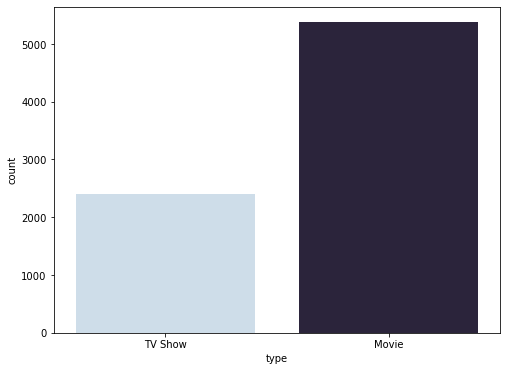

In [10]:
plt.figure(figsize = (8,6))
sns.countplot(x="type", data=netflix, palette="ch:s=.20,rot=-.20")

#### Retiramos o tipo serie e deixamos so o tipo filme, para que nesta aba possamos trabalhar so com os filmes da netflix.

In [11]:
netflix_filmes = netflix.loc[netflix["type"] == "Movie"]
netflix_filmes

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


# Pergunta:
## Varição de filmes adicionados na netflix?

### Limpamos a coluna date_added para pegar so o ano, com isso nos pudéssemos fazer um gráfico com a variação de filmes adicionados na netflix.

In [21]:
non_tbd_dates = netflix_filmes["date_added"][netflix_filmes["date_added"] != "NAN"]
netflix_filmess = netflix_filmes
netflix_filmess["date_added"] = pd.to_datetime(non_tbd_dates)
netflix_filmess["date_added"] = netflix_filmess["date_added"].dt.year
x = pd.DataFrame(netflix_filmess, columns= ["date_added"])
date_added_filmes = x.pivot_table(index=["date_added"], aggfunc='size')

<ipython-input-21-08737abf3f61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_filmess["date_added"] = pd.to_datetime(non_tbd_dates)
<ipython-input-21-08737abf3f61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_filmess["date_added"] = netflix_filmess["date_added"].dt.year


In [36]:
date_added_filmes

date_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      58
2016     258
2017     864
2018    1255
2019    1497
2020    1312
2021      88
dtype: int64

<AxesSubplot:xlabel='date_added'>

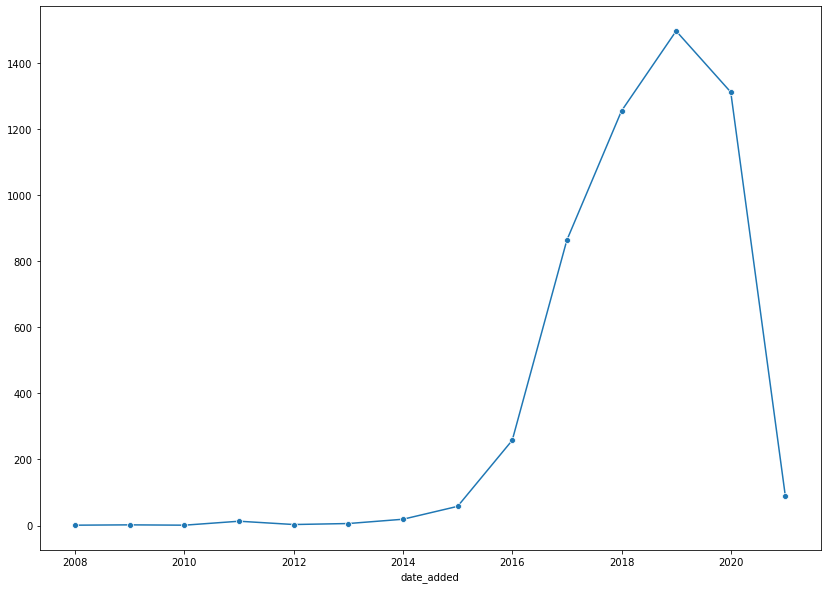

In [13]:
plt.figure(figsize = (14,10))
sns.lineplot(data = date_added_filmes,  x = "date_added" , y = date_added_filmes , marker="o")

### Grafico de representação do ano de lançamento dos filmes

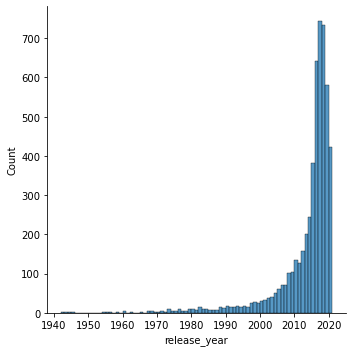

In [14]:
sns.displot(netflix_filmes, x="release_year",binwidth=1)

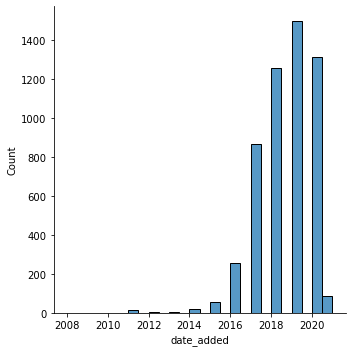

In [15]:
sns.displot(netflix_filmess, x="date_added",binwidth=0.5)

# Pergunta:
## Qual o gênero de filme mais predominante no catálogo da netflix?

In [17]:
x = pd.DataFrame(netflix_filmes, columns= ["listed_in"])
generos = x.pivot_table(index=["listed_in"], aggfunc='size')
generos

listed_in
Action & Adventure                                               99
Action & Adventure, Anime Features, Children & Family Movies      3
Action & Adventure, Anime Features, Classic Movies                1
Action & Adventure, Anime Features, Horror Movies                 1
Action & Adventure, Anime Features, International Movies         28
                                                               ... 
Sci-Fi & Fantasy                                                  1
Sci-Fi & Fantasy, Thrillers                                      10
Sports Movies                                                     1
Stand-Up Comedy                                                 321
Thrillers                                                        49
Length: 265, dtype: int64

In [18]:
generos.sort_values(ascending = False)

listed_in
Documentaries                                              334
Stand-Up Comedy                                            321
Dramas, International Movies                               320
Comedies, Dramas, International Movies                     243
Dramas, Independent Movies, International Movies           215
                                                          ... 
Anime Features, Romantic Movies                              1
Children & Family Movies, Classic Movies                     1
Comedies, Romantic Movies, Sports Movies                     1
Children & Family Movies, Classic Movies, Dramas             1
International Movies, Romantic Movies, Sci-Fi & Fantasy      1
Length: 265, dtype: int64

# Pergunta:
## Quais são os 5 diretores com mais filmes que estão presentes no catálogo da netflix?

In [19]:
x = pd.DataFrame(netflix_filmes, columns= ["director"])
top_directors = x.pivot_table(index=["director"], aggfunc='size')
top_directors

director
A. L. Vijay            2
A. Raajdheep           1
A. Salaam              1
A.R. Murugadoss        2
Aadish Keluskar        1
                      ..
Çagan Irmak            1
Ísold Uggadóttir       1
Óskar Thór Axelsson    1
Ömer Faruk Sorak       2
Şenol Sönmez           2
Length: 3909, dtype: int64

In [20]:
top_directors.sort_values(ascending = False)

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Macon Blair                1
Maciej Dejczer             1
M.J. Isakson               1
M.J. Bassett               1
Khalid Mohamed             1
Length: 3909, dtype: int64

In [30]:
netflix_filmes["director"].value_counts()[:4].index.tolist()

['Raúl Campos, Jan Suter', 'Marcus Raboy', 'Jay Karas', 'Cathy Garcia-Molina']

#### Pegamos a coluna country para saber qual o pais q teve mais produção de filme.

In [22]:
x = pd.DataFrame(netflix_filmes, columns= ["country"])
top_country = x.pivot_table(index=["country"], aggfunc='size')
top_country

country
Argentina                                              34
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        1
Argentina, Chile, Peru                                  1
Argentina, France                                       1
                                                       ..
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 5
West Germany                                            1
Zimbabwe                                                1
Length: 590, dtype: int64

In [23]:
top_country.sort_values(ascending = False)

country
United States                            1850
India                                     852
United Kingdom                            193
Canada                                    118
Egypt                                      89
                                         ... 
Portugal, Spain                             1
United States, Canada, Japan, Panama        1
Romania, Bulgaria, Hungary                  1
Romania, France, Switzerland, Germany       1
Zimbabwe                                    1
Length: 590, dtype: int64

In [24]:
netflix_filmes["country"].value_counts()[:3].index.tolist()

['United States', 'India', 'United Kingdom']

#### Pegamos as colunas director e country para ver quantos filmes um unico diretor fez em um determinado pais.

In [25]:
x = pd.DataFrame(netflix_filmes, columns= ["director","country"])
directors_and_country = x.pivot_table(index=["director","country"], aggfunc='size')
directors_and_country.sort_values(ascending = False)

director             country                                                        
Marcus Raboy         United States                                                      14
Jay Karas            United States                                                      14
Cathy Garcia-Molina  Philippines                                                        13
Jay Chapman          United States                                                      12
David Dhawan         India                                                               9
                                                                                        ..
Martin Campbell      United States, Germany, Mexico                                      1
                     United Kingdom, United States                                       1
                     United Kingdom, Czech Republic, United States, Germany, Bahamas     1
                     United Kingdom, China, United States, India                         1
Kiran

#### Pegamos as colunas director e listed_in para ver qual categoria de filme um determinado diretor tem mais produção. 

In [26]:
x = pd.DataFrame(netflix_filmes, columns= ["director","listed_in"])
directors_and_gender = x.pivot_table(index=["director","listed_in"], aggfunc='size')
directors_and_gender.sort_values(ascending = False)

director                    listed_in                                    
Raúl Campos, Jan Suter      Stand-Up Comedy                                  18
Marcus Raboy                Stand-Up Comedy                                  15
Jay Karas                   Stand-Up Comedy                                  13
Jay Chapman                 Stand-Up Comedy                                  12
Shannon Hartman             Stand-Up Comedy                                   8
                                                                             ..
Neeraj Pandey               Dramas, International Movies, Thrillers           1
Neal Brennan                Comedies                                          1
Naya Anindita               Dramas, International Movies, Romantic Movies     1
Nawapol Thamrongrattanarit  Dramas, International Movies, Romantic Movies     1
A. L. Vijay                 Comedies, Dramas, International Movies            1
Length: 4649, dtype: int64

#### Tivemos uma ideia de fazer um grafico de duração dos filmes em minutos,mas tivemos o problema de q no nosso data set a coluna duration apresentava o min em cada linha para determinar q estava em minutos a representação de tempo dessa coluna,então para isso fizemos a limpeza de dado removendo o min.

In [27]:
netflix_filmes['duration']=netflix_filmes['duration'].str.replace(' min','')
netflix_filmes['duration']=netflix_filmes['duration'].astype(str).astype(int)

<ipython-input-27-d1a8d9d4df3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_filmes['duration']=netflix_filmes['duration'].str.replace(' min','')
<ipython-input-27-d1a8d9d4df3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_filmes['duration']=netflix_filmes['duration'].astype(str).astype(int)


<AxesSubplot:xlabel='duration', ylabel='Density'>

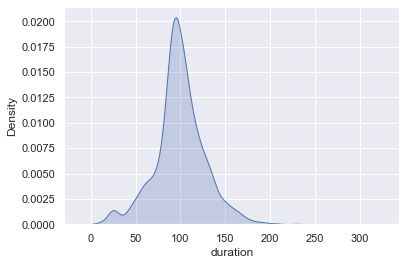

In [28]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_filmes["duration"], shade=True)

#### Fizemos esse grafico para sabermos qual classificação de filme é predominante no catalogo da netflix.

<AxesSubplot:xlabel='rating', ylabel='count'>

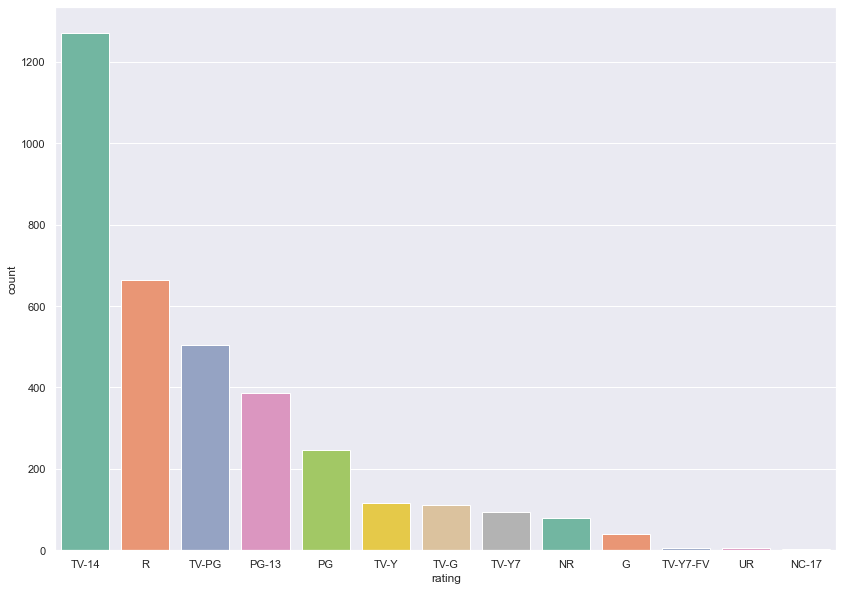

In [29]:
plt.figure(figsize = (14,10))
sns.countplot(x="rating", data=netflix_filmes, palette="Set2", order=netflix_filmes["rating"].value_counts().index[1:15])

## Significado de cada classificação acima:
#### TV-14  = Não recomendado para menores de 14 anos.
##### A classificação "TV-14" podem ser acompanhadas por um ou mais das seguintes sub-classificações:
##### D = para diálogos.
##### L = para linguagem inapropriada leve ou infrequente ou um pouco intensa.
##### S = para conteudo sexuais forte.
##### V = para violência leve ou intensa.

#### R = O filme contém algum tipo de conteúdo adulto.

#### TV-PG = Classificação destinada com a orientação parental. Esta classificação significa que o programa pode não ser adequado para crianças menores sem a orientação dos pais.
#### A classificação PG-TV podem ser acompanhadas por um ou mais das seguintes sub-classificações:
#### D = para diálogos.
##### L = para linguagem inapropriada leve ou infrequente.
##### S = para algumas com conteúdos sexuais.
##### V = para violência leve.

#### PG-13 = Parental guidance 13 (orientação dos pais, para crianças abaixo de 13 anos, fortemente sugerida).

#### PG = Esta classificação significa que o programa pode não ser adequado para crianças menores sem a orientação dos pais.

#### TV-Y = Conteúdo infantil.
##### Animações ou live-actions infantis, os temas e os elementos neste programa são projetados especificamente para um público muito jovem, incluindo crianças de idades 2 à 6.

#### TV-G = Recomendado para todos os públicos.
##### Embora, esta classificação não é muito usado para ser atribuído nas animações especificamente para crianças, a maioria dos pais podem deixar as crianças mais jovens assistir este programa autônomo.

#### TV-Y7 = Não recomendado para menores de 7 anos.

#### NR = Não recomendado. Responsável: parentes até o 4º grau maiores de idade (pais, avós, padrastos, irmãos, tios, primos), tutor, curador ou o detentor da guarda.

#### G = significa que o filme é liberado para pra todo mundo, numa tradução livre de “general audiences”.

#### TV-Y7-FV = Não recomendado para menores de 7 anos com violência fantasiosa.


# conclusão:
#### Com esse nosso trabalho indentificamos que a quantidades de filmes presentes no catálogo da netflix comparado com o de series é quase duas vezes maior que o de series. Podemos perceber que no decorrer dos anos a netflix vem aumentando a quantidade de series lançadas por ano, que tambem a categoria de stand - up é a categoria que mais apresentas filmes em seu catalogo e entre outras coisas a mais.
#### Uma das nossas limitações que mais impactou, pode se dizer que seja a maioria das colunas desse nosso dataset era de linhas em string, onde elas acabaram dificultando para  fazermos graficos com seus conteudos.
#### Nos gostariamos que se fossemos trabalhar denovo com esse tema que tivessemos mais colunas detalhando um pouco mais sobre cada filme/serie presente no catalogo da netflix, exemplo: uma coluna mostrando quantas pessoas assistiram esse filme/series, se o filme/serie foi feito pela netflix ou não,qual a avalição desse filme/series(se o público gostou dele), No caso um dataset com uma riqueza de detalhes.